In [82]:
import pandas as pd
from collections import OrderedDict
from __future__ import division
import missingno as msno
import seaborn as sns
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split





In [2]:
data = pd.read_csv("loan.csv")

/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Drop empty title/desc rows
data = data.dropna(axis=0, subset=['title', 'desc'])

In [4]:
def visualize_nulls(data, save_name = "missing_values", cut_off = 0.8):
    columns = {}
    for column in  data.columns.tolist():
        columns [column] = data[column].isnull().sum()
    columns =  OrderedDict(sorted(columns.items(), key=lambda(k,v):(v,k)))
    missing_plot = msno.bar(data[columns.keys()], fontsize = 8 )
    missing_plot.set_title("Visualizaton of Missing Data", y=1.09, fontsize = 15)
    missing_plot.plot([-10, 102], [0.50, 0.50], 'k-', lw=2, color = 'r')
    missing_plot.set_xlabel("Column Name", fontsize = 15)
    missing_plot.figure.savefig("missing_values", bbox_inches = "tight")
    missing_plot.figure.show()
    columns_to_drop = []
    for value, key in columns.items():
        percentage =  ((data.shape[0] - key) / data.shape[0])
        print value, percentage
        if (percentage < 0.50):
            columns_to_drop.append(value)
    return columns_to_drop

In [5]:
data.shape

(126056, 145)

/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


addr_state 1.0
application_type 1.0
collection_recovery_fee 1.0
debt_settlement_flag 1.0
desc 1.0
disbursement_method 1.0
dti 1.0
funded_amnt 1.0
funded_amnt_inv 1.0
grade 1.0
hardship_flag 1.0
home_ownership 1.0
initial_list_status 1.0
installment 1.0
int_rate 1.0
issue_d 1.0
last_pymnt_amnt 1.0
loan_amnt 1.0
loan_status 1.0
out_prncp 1.0
out_prncp_inv 1.0
policy_code 1.0
purpose 1.0
pymnt_plan 1.0
recoveries 1.0
revol_bal 1.0
sub_grade 1.0
term 1.0
title 1.0
total_pymnt 1.0
total_pymnt_inv 1.0
total_rec_int 1.0
total_rec_late_fee 1.0
total_rec_prncp 1.0
verification_status 1.0
zip_code 1.0
annual_inc 0.9999682680713333
last_credit_pull_d 0.9999286031605001
acc_now_delinq 0.9997778764993336
delinq_2yrs 0.9997778764993336
delinq_amnt 0.9997778764993336
earliest_cr_line 0.9997778764993336
inq_last_6mths 0.9997778764993336
open_acc 0.9997778764993336
pub_rec 0.9997778764993336
total_acc 0.9997778764993336
tax_liens 0.9992780986228343
last_pymnt_d 0.999008377229168
revol_util 0.9989766453

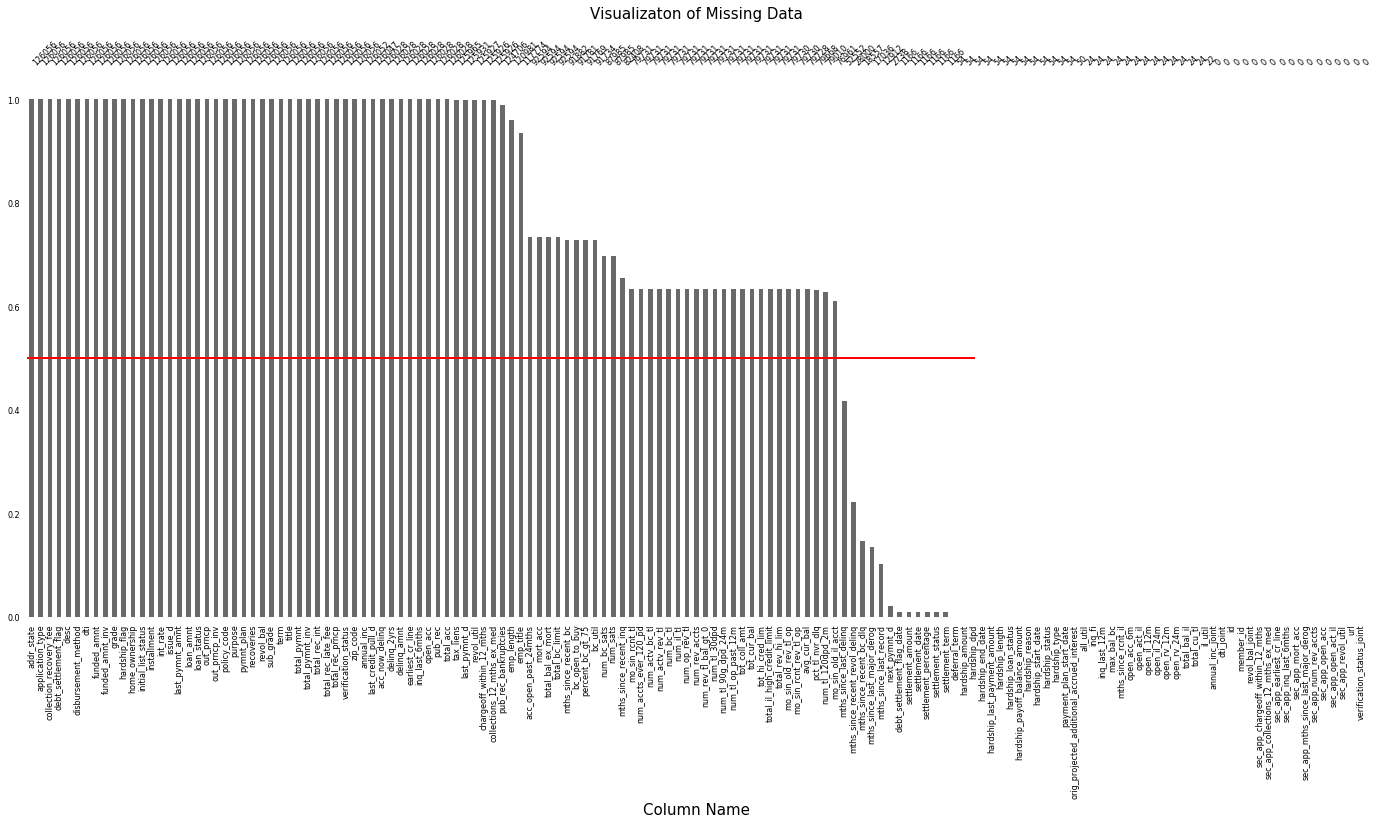

In [6]:
columns_to_drop = visualize_nulls(data)

In [7]:
columns_to_drop

['mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_amount',
 'settlement_date',
 'settlement_percentage',
 'settlement_status',
 'settlement_term',
 'deferral_term',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'payment_plan_start_date',
 'orig_projected_additional_accrued_interest',
 'all_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_rcnt_il',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'total_bal_il',
 'total_cu_tl',
 'il_util',
 'annual_inc_joint',
 'dti_joint',
 'id',
 'member_id',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_col

In [8]:
data_dropped_cutoff = data.drop(columns_to_drop, axis='columns')

In [9]:
data_dropped_cutoff.shape

(126056, 88)

In [30]:
data.shape, data_dropped_cutoff.shape

((126056, 145), (126056, 88))

In [44]:
df = data_dropped_cutoff.dropna()

In [45]:
df.shape

(63229, 88)

In [13]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
                             ..
mo_sin_r

In [65]:
df.shape

(63229, 88)

In [ ]:
['age_earliest_cr',
 'fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 'all_util',
 'loan_to_income',
 'installment_pct_inc',
 'il_util',
 'il_util_ex_mort',
 'total_bal_il',
 'total_cu_tl']

In [64]:

APPLICANT_NUMERIC = ['annual_inc', 'dti', 'loan_amnt', 'installment']
APPLICANT_CATEGORICAL = ['application_type', 'emp_length', 'home_ownership', 'addr_state', 'term']
CREDIT_NUMERIC = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
                  'bc_util', 'delinq_2yrs', 'delinq_amnt', 'open_acc', 'pub_rec', 'revol_util',
                  'revol_bal', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_rev_hi_lim',
                  'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
                  'num_bc_tl', 'num_il_tl', 'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq',
                  'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
                  'total_il_high_credit_limit']
LABEL = ['grade']

In [66]:
def encode_categorical(frame, categorical_cols):
    for col in categorical_cols:
        frame = frame.merge(pd.get_dummies(frame[col]), left_index=True, right_index=True)
        frame.drop(col, axis=1, inplace=True)
    return frame

In [67]:
def split_data(data, continuous_cols, categorical_cols, label_col, test_size=0.2, row_limit=None):
        
        x_df = data.loc[:, continuous_cols + categorical_cols]

        x_df = encode_categorical(x_df, categorical_cols)

        for col in continuous_cols:
            x_df[col] = (x_df[col] - x_df[col].mean()) / x_df[col].std()

        # Specify the target labels and flatten the array
        y = pd.get_dummies(data[label_col])

        x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=test_size, random_state=23)
        print("x_train contains {} rows and {} features".format(x_train.shape[0], x_train.shape[1]))
        return x_train, x_test, y_train, y_test

In [68]:
x_train, x_test, y_train, y_test = split_data(df, APPLICANT_NUMERIC + CREDIT_NUMERIC, APPLICANT_CATEGORICAL, LABEL)

x_train contains 50583 rows and 98 features


In [71]:
print("x_train contains {} rows and {} features".format(x_train.shape[0], x_train.shape[1]))
print("y_train contains {} rows and {} features".format(y_train.shape[0], y_train.shape[1]))

print("x_test contains {} rows and {} features".format(x_test.shape[0], x_test.shape[1]))
print("y_test contains {} rows and {} features".format(y_test.shape[0], y_test.shape[1]))

# Loan grade has been one-hot encoded
print("Sample one-hot encoded 'y' value: \n{}".format(y_train.sample()))

x_train contains 50583 rows and 98 features
y_train contains 50583 rows and 7 features
x_test contains 12646 rows and 98 features
y_test contains 12646 rows and 7 features
Sample one-hot encoded 'y' value: 
         grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G
2057584        0        0        0        0        0        1        0


In [48]:
x_train.shape

(50583, 110)

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint


def create_model(input_dim, output_dim):
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # hidden layer
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(output_dim, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [74]:
from keras.models import load_model


In [76]:
model = create_model(x_train.shape[1], y_train.shape[1])

        # Model converges faster on larger data set with larger batches
epochs = 30 

batch_sz = 1024

print("Beginning model training with batch size {} and {} epochs".format(batch_sz, epochs))

checkpoint = ModelCheckpoint("lc_model.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
        # train the model
history = model.fit(x_train.as_matrix(),y_train.as_matrix(),validation_split=0.2, epochs=epochs,  
                    batch_size=batch_sz, verbose=2,callbacks=[checkpoint])

        # revert to the best model encountered during training
best_model = load_model("lc_model.h5")

Beginning model training with batch size 1024 and 30 epochs
Train on 40466 samples, validate on 10117 samples
Epoch 1/30
 - 1s - loss: 1.6021 - acc: 0.3519 - val_loss: 1.4284 - val_acc: 0.4177
Epoch 2/30
 - 0s - loss: 1.3984 - acc: 0.4201 - val_loss: 1.3214 - val_acc: 0.4507
Epoch 3/30
 - 0s - loss: 1.3096 - acc: 0.4551 - val_loss: 1.2521 - val_acc: 0.4762
Epoch 4/30
 - 0s - loss: 1.2556 - acc: 0.4754 - val_loss: 1.2196 - val_acc: 0.4846
Epoch 5/30
 - 0s - loss: 1.2258 - acc: 0.4864 - val_loss: 1.1948 - val_acc: 0.4930
Epoch 6/30
 - 0s - loss: 1.2001 - acc: 0.4933 - val_loss: 1.1749 - val_acc: 0.4992
Epoch 7/30
 - 0s - loss: 1.1794 - acc: 0.4988 - val_loss: 1.1585 - val_acc: 0.5052
Epoch 8/30
 - 0s - loss: 1.1622 - acc: 0.5070 - val_loss: 1.1415 - val_acc: 0.5093
Epoch 9/30
 - 0s - loss: 1.1480 - acc: 0.5165 - val_loss: 1.1246 - val_acc: 0.5173
Epoch 10/30
 - 0s - loss: 1.1288 - acc: 0.5222 - val_loss: 1.1065 - val_acc: 0.5289
Epoch 11/30
 - 0s - loss: 1.1104 - acc: 0.5278 - val_loss: 

In [83]:

def plot_history(history, save_file = None):

    plt.rcParams["figure.figsize"] = [16, 5]
    plt.rcParams["axes.titlesize"] = 18
    plt.rcParams["axes.labelsize"] = 16
    plt.rcParams["xtick.labelsize"] = 12
    plt.rcParams["ytick.labelsize"] = 12
    plt.rcParams['legend.loc'] = 'upper right'
    plt.rcParams['legend.framealpha'] = 0.7
    plt.rcParams["legend.fontsize"] = 14

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid.'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid.'], loc='upper left')

    # adjust size
    plt.tight_layout()
    if save_file is None:
        plt.show()
    else:
        plt.savefig(save_file)
        plt.close()

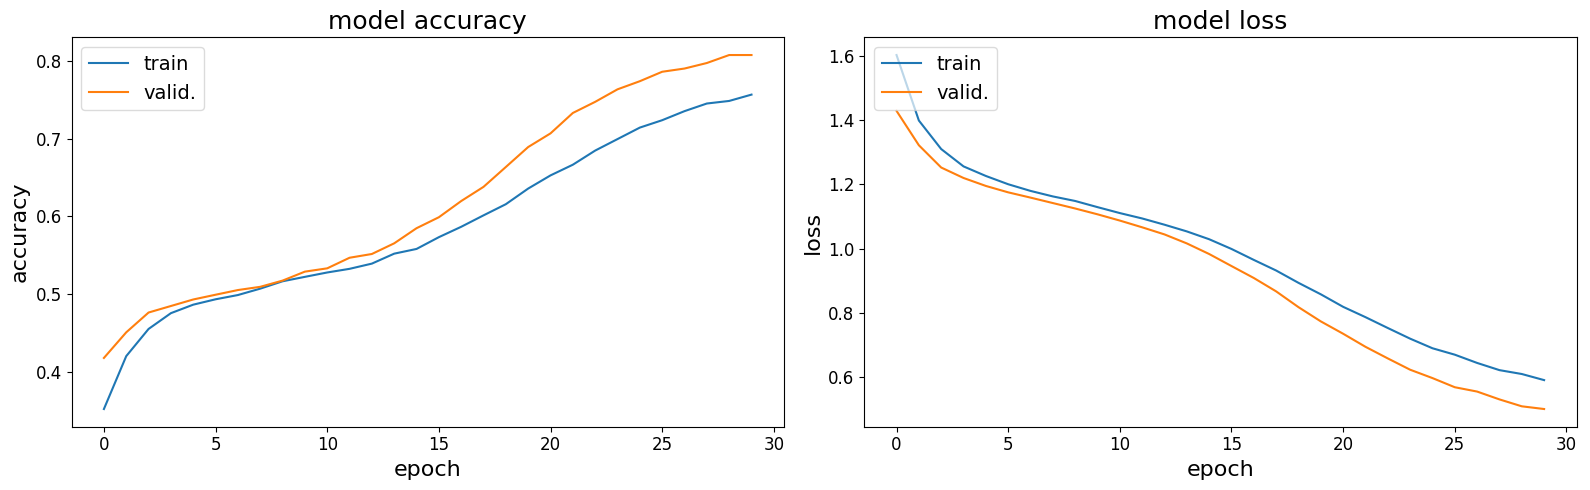

In [84]:
sns.reset_orig()
plot_history(history)
